# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.

### Import additional libraries

In [3]:
import seaborn as sns
import numpy as np
from scipy import stats
import math
import itertools

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

### Inspect the data

In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [5]:
# How many rows does the DataFrame have?
len(df)

130

In [6]:
# Does the DataFrame contain any null values?
df.any().isnull()

temperature    False
gender         False
heart_rate     False
dtype: bool

In [7]:
# Check summary statistics of the data.
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [8]:
# Check if the data set is balanced with respect to gender.
df.gender.value_counts()

F    65
M    65
Name: gender, dtype: int64

## 1. Is the distribution of body temperatures normal?

In our normality test, our null-hypothesis is that the population of body temperatures (from which our sample is taken) is normally distributed. 

+ The skewness of any univariate normal distribution is 0.

+ The kurtosis of any univariate normal distribution is 3.

By subtracting 3 from the kurtosis, we can obtain a measure of excess kurtosis (also known as "Fisher's kurtosis").  The excess kurtosis of any univariate normal distribution is 0.

We can state our null-hypothesis as follows: 

+ $H_0$ : The population of body temperatures has skewness equal to 0 and has excess kurtosis equal to 0.

+ $H_1$ : The population of body temperatures non-zero skewness or has non-zero excess kurtosis.

We will assume a significance level of $\alpha$ = 0.05 (or 95%) for normality tests.

+ $\alpha$ = 0.05

We use scipy's normtest function, which is based on D’Agostino and Pearson’s test of normality.  Given a sample, the normtest function will calculate and return:

1. k2 (Test Statistic) : $s^2 + k^2$, where $s$ is the z-score returned by skewtest and $k$ is the z-score returned by kurtosistest; and
2. p-value : A 2-sided chi squared probability for the hypothesis test.

In [9]:
tmp = df.temperature

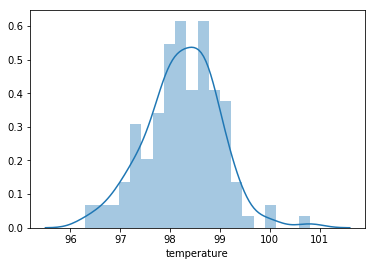

In [10]:
# Does the distribution of our sample of body temperatures look like a normal distribution?
sns.distplot(tmp, bins=20)

In [11]:
# Use D’Agostino and Pearson’s test of normality.
normaltest_results = stats.mstats.normaltest(tmp)
normaltest_results_df = pd.DataFrame([normaltest_results[1], normaltest_results[0]],
                                     ['p-value', 'Test Statistic'], 
                                     columns={'Results'})
normaltest_results_df

,Results
p-value,0.258748
Test Statistic,2.703801


Find the critical value for the ${\chi}^2$ distribution with 2 degrees of freedom ($k=2$) and assuming a significance level of $\alpha$ = 0.05

In [12]:
alpha = 0.05

# isf: Inverse Survival Function (Inverse of SF), where
# sf: Survival Function (1-CDF)

chi_sqr_crit = stats.chi2.isf(alpha, 2)
chi_sqr_crit

5.9914645471079817

If the test statistic is greater than or equal to the critical value, then we reject the null-hypothesis (and conclude that the population is not normally distributed).

If the test statistic is less than the critical value, then we cannot reject the null-hypothesis (and conclude that the population may be normally distributed).

In [13]:
if (normaltest_results_df.loc['Test Statistic'][0] >= chi_sqr_crit):
    print('\t', 'Critical value = {0:.3f}'.format(chi_sqr_crit), '\n',
          '\t', 'Test statistic = {0:.3f}'.format(normaltest_results_df.loc['Test Statistic'][0]), '\n',
          '\t', '{0:.3f}'.format(normaltest_results_df.loc['Test Statistic'][0]), 
          ' >= ', '{0:.3f}'.format(chi_sqr_crit), '\n',
          '\t', 'Reject the null-hypothesis', '\n', 
          '\t', 'Conclude that the population is not normally distributed')
else:
    print('\t', 'Critical value = {0:.3f}'.format(chi_sqr_crit), '\n',
          '\t', 'Test statistic = {0:.3f}'.format(normaltest_results_df.loc['Test Statistic'][0]), '\n',
          '\t', '{0:.3f}'.format(normaltest_results_df.loc['Test Statistic'][0]), 
          ' < ', '{0:.3f}'.format(chi_sqr_crit), '\n',
          '\t', 'Cannot reject the null-hypothesis', '\n',
          '\t', 'Conclude that the population is may be normally distributed')


	 Critical value = 5.991 
 	 Test statistic = 2.704 
 	 2.704  <  5.991 
 	 Cannot reject the null-hypothesis 
 	 Conclude that the population is may be normally distributed


We cannot reject the null-hypothesis that the population of body temperatures has skewness equal to 0 and has excess kurtosis equal to 0. We conclude that the population may be normally distributed.

Next, we'll plot:
+ The pdf of the  ${\chi}_{k=2}^2$ distribution;
+ The critical value for the ${\chi}_{k=2}^2$ distribution (assuming $\alpha$ = 0.05); and
+ The test statistic.

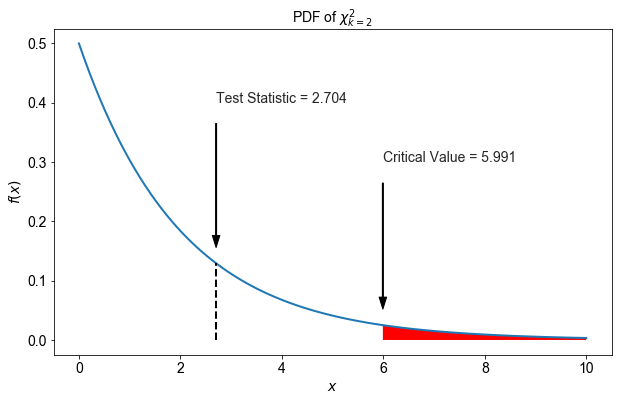

In [14]:
my_linspace = np.linspace(start=0, stop=10, num=100)

my_pdf = stats.chi2.pdf(my_linspace, 2)

my_linspace_crit = np.linspace(start=chi_sqr_crit, stop=10, num=100)

my_pdf_crit = stats.chi2.pdf(my_linspace_crit, 2)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(my_linspace, my_pdf, linewidth=2)

crit_label = 'Critical Value = ' + '{0:.3f}'.format(chi_sqr_crit)

ax.fill_between(my_linspace_crit, 0, my_pdf_crit, facecolor='red', label=crit_label)

ts = normaltest_results_df.loc['Test Statistic'][0]
ts_y = stats.chi2.pdf(ts, 2)
ts_label = 'Test Statistic = ' + '{0:.3f}'.format(ts)
ax.plot([ts, ts], [0, ts_y], 'k--', linewidth=2, label=ts_label)

sns.set_style("darkgrid")   
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

plt.title('PDF of ${\chi}_{k=2}^2$')
# k: degrees of freedom


ax.annotate(crit_label, 
            xy=(chi_sqr_crit, stats.chi2.pdf(chi_sqr_crit, 2)), 
            xytext=(chi_sqr_crit, 0.3), 
            arrowprops=dict(facecolor='k', 
                            width=1,
                            headwidth=7.5,
                            shrink=0.1))

ax.annotate(ts_label, 
            xy=(ts, ts_y), 
            xytext=(ts, 0.4), 
            arrowprops=dict(facecolor='k', 
                            width=1,
                            headwidth=7.5,
                            shrink=0.1))

annotations = [child for child in ax.get_children() 
               if isinstance(child, matplotlib.text.Annotation)]

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + annotations + 
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
    
plt.show()

We cannot reject the null-hypothesis, and we conclude that the population may be normally distributed.


## 2. Is the sample size large? Are the observations independent?

Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 



#### 2.1 Is the sample size large?

In [15]:
df.count()

temperature    130
gender         130
heart_rate     130
dtype: int64

In [16]:
N = df.shape[0]
N

130

The sample size is $N=130$

In [17]:
# http://www.itl.nist.gov/div898/handbook/prc/section2/prc222.htm

# Define a function that takes margin of error ('me'),
# sigma, and significance level ('alpha'),
# and returns the minimum sample size n.

def sample_size(me=None, sigma=None, alpha=None):
    z = stats.norm.isf(alpha/2)
    n = math.ceil(((z ** 2) * (sigma ** 2)) / (me ** 2))
    return n

# set parameters
me = 0.50
sigma = 1.8
alpha = 0.01

n = sample_size(me=me, sigma=sigma, alpha=alpha)
n

86

In [18]:
if N > n:
    print('The sample size is large enough.')
else:
    print('The sample size is not large enough.')

The sample size is large enough.


The sample size is large enough.

We can also check different minimum sample sizes given different parameter combinations.

In [19]:
# source:
# https://www.safaribooksonline.com/library/view/python-cookbook-2nd/0596007973/ch19s02.html

def frange(start, end=None, inc=1.0):
    "An xrange-like generator which yields float values"
    # imitate range/xrange strange assignment of argument meanings
    if end is None:
        end = start + 0.0     # Ensure a float value for 'end'
        start = 0.0
    assert inc                # sanity check
    for i in itertools.count( ):
        next = start + i * inc
        if (inc>0.0 and next>=end) or (inc<0.0 and next<=end):
            break
        yield next
        
me_rows = [round(x, 1) for x in frange(0.5, 0, -0.1)]
alpha_columns = [0.10, 0.05, 0.01]

a = np.empty((len(me_rows),len(alpha_columns)))
a[:] = np.NAN

sigma = tmp.std() 

for i, r in enumerate(me_rows):
    for j, c in enumerate(alpha_columns):
        a[(i, j)] = sample_size(me=r, sigma=sigma, alpha=c)

my_df = pd.DataFrame(data=a,
                     columns=alpha_columns, 
                     index=me_rows)

my_df.index.rename('Margin of Error \n(degrees F)', inplace=True)
my_df.columns.rename(name='alpha', inplace=True)
my_df

alpha,0.1,0.05,0.01
Margin of Error (degrees F),,,
0.5,6.0,9.0,15.0
0.4,10.0,13.0,23.0
0.3,17.0,23.0,40.0
0.2,37.0,52.0,90.0
0.1,146.0,207.0,357.0


#### 2.2 Are the observations independent?

We will test whether the body temperature observations are independent of heart rate.  

We regress temperature (y) against heart rate (x) using linear regression.  Let $\beta$ represent the regression coefficient from this linear regression.

We can state our null-hypothesis as follows: 

+ $H_0$ : $\beta = 0$

+ $H_1$ : $\beta \neq 0$

We will test this hypothesis using bootstrapping.


In [20]:
# Calculate the linear regression parameters from the data

x = df.heart_rate
y = df.temperature

slope_actual, intercept_actual, \
    r_value_actual, p_value_actual, \
    std_err_actual = stats.linregress(x,y)
    
slope_actual

0.02633454850669972

In [21]:
# Define a function that will bootstrap iters=1000 samples 
# from the DataFrame and return 3 numpy arrays containing
# the (1) regression slopes, (2) regression intercepts, and 
# (3) correlation coefficients form the bootstrapped samples 

def reg_sampling_distribution(n=len(df), iters=10000):
    slopes = []
    intercepts = []
    corr_coefs = []
    for i in range(iters):
        df_resampled = df.sample(len(df), replace=True)
        
        slope, intercept, r_value, p_value, std_err = \
            stats.linregress(df.heart_rate,
                             df.temperature)
        slopes.append(slope)
        intercepts.append(intercept)
        corr_coefs.append(r_value)
    return np.array(slopes), np.array(intercepts), np.array(corr_coefs)

In [22]:
# Use reg_sampling_distribution to generate 
# sampling distributions for the (1) regression slopes, 
# (2) regression intercepts, and (3) correlation coefficients

slope_sampling, intercept_sampling, corr_coef_sampling = \
    reg_sampling_distribution(n=len(df), iters=10000)

In [23]:
# Set popmean: expected value in null hypothesis
null_coef = 0

# T-test
t_test_results = stats.ttest_1samp(slope_sampling, null_coef)

temp_dict = {'t-statistic': [t_test_results[0]],
             'two-tailed p-value': [t_test_results[1]]}

t_test_results_df = pd.DataFrame.from_dict(temp_dict)
t_test_results_df

,t-statistic,two-tailed p-value
0,1.897509e+17,0.0


In [24]:
if t_test_results_df['two-tailed p-value'].values[0] < alpha:
    print('Reject H_0')
else:
    print('Cannot reject H_0')

Reject H_0


We can reject the null hypothesis that the regression coefficient $\beta = 0$, since the p-value is below 5%.

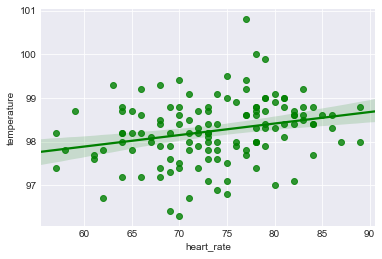

In [25]:
ax = sns.regplot(x=df.heart_rate, y=df.temperature, color="g")

## 3.  Is the true population mean really 98.6 degrees F?

+ 3.1 Would you use a one-sample or two-sample test? Why?
+ 3.2 In this situation, is it appropriate to use the $t$ or $z$ statistic? 
+ 3.3 Now try using the other test. How is the result be different? Why?


### 3.1 Would you use a one-sample or two-sample test? Why?

To test if the true population mean is equal to a specific value (*namely*, 98.6 degrees Fahrenheit), one would use a two-tailed, one-sample test.

The test that the mean for a sample is equal to a specified value can be formulated as follows:

+ $H_0$: 	$\mu =$ [specific value]
+ $H_1$: 	$\mu \neq$ [specific value]

A two-sample test would used to determine if two population means are equal (*e.g.*, to test if the population mean for men is equal to the population mean for women).  Therefore,two-sample test is not appropriate for this problem (testing whether or not the true population mean is equal to 98.6 degrees Fahrenheit).

References:
+ http://www.itl.nist.gov/div898/handbook/eda/section3/eda353.htm
+ http://www.itl.nist.gov/div898/software/dataplot/refman1/auxillar/t_test.htm
+ http://www.statisticssolutions.com/manova-analysis-one-sample-t-test/

### 3.2 In this situation, is it appropriate to use the $t$ or $z$ statistic? 


A t-test is used for testing the mean of one population against a standard or comparing the means of two populations if you do not know the populations' standard deviation and when you have a limited sample (n < 30). 

If you know the populations' standard deviation, you may use a z-test.

References:
+ https://www.linkedin.com/pulse/z-test-vs-t-test-arunmozhi-ilango/
+ https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

In [26]:
# Set popmean: expected value in null hypothesis
popmean = 98.6

# T-test
t_test_results = stats.ttest_1samp(df.temperature, popmean=popmean)

temp_dict = {'t-statistic': [t_test_results[0]],
             'two-tailed p-value': [t_test_results[1]]}

t_test_results_df = pd.DataFrame.from_dict(temp_dict)
t_test_results_df

,t-statistic,two-tailed p-value
0,-5.454823,2.410632e-07


In [27]:
if t_test_results_df['two-tailed p-value'].values[0] < alpha:
    print('Reject H_0')
else:
    print('Cannot reject H_0')

Reject H_0


We can reject the null hypothesis that the population mean equal 98.6 degrees, since the p-value is below 5%

In [28]:
df.temperature.mean()

98.24923076923078

When we calculate the mean temperature from our data, we get a point estimate of 98.25

### 3.3 Now try using the other test. How is the result be different? Why?

In [29]:
# Set popmean: expected value in null hypothesis
pop_mean = 98.6

# estimate the population standard deviation 
# using the smaple standard deviation.
pop_std = df.temperature.std()

sqrt_n = np.sqrt(len(df.temperature))

sample_mean = df.temperature.mean()

z_stat = (sample_mean - pop_mean)/(pop_std/sqrt_n)

p_values = stats.norm.sf(abs(z_stat))*2 #twosided
print('p_values = ', p_values)

p_values =  4.90215701411e-08


In [30]:
if p_values < alpha:
    print('Reject H_0')
else:
    print('Cannot reject H_0')

Reject H_0


We can reject the null hypothesis that the population mean equal 98.6 degrees, since the p-value is below 5%

## 4. At what temperature should we consider someone's temperature to be "abnormal"?

Let us consider someone's temperature to be "abnormal" if the temperature is either above or below the inner-quartile range (IQR) of tempuratures.

We will bootstrap pairs of the 25th and 75th percentiles, which are the bounds of the IQR.  We then calculate 95% confidence intervals around the 25th and 75th percentiles.

If someone's temperature is either: 

+ below the 95% confidence interval around the 25th percentile, or
+ above the 95% confidence interval around the 75th percentile

then we should consider the person's temperature to be "abnormal".

In [31]:
from astropy.stats.funcs import bootstrap

In [32]:
bootfunc = lambda a: np.percentile(a, [25, 75])

bs_iqr = bootstrap(df.temperature.values,
                       bootnum=10000,
                       samples=len(df.temperature.values), 
                       bootfunc=bootfunc)

In [33]:
lq_ci = np.percentile(bs_iqr[:,0], [(alpha/2), 1-(alpha/2)])
lq_ci

array([ 97.4,  97.6])

In [34]:
uq_ci = np.percentile(bs_iqr[:,1], [(alpha/2), 1-(alpha/2)])
uq_ci

array([ 98.4,  98.6])

In [35]:
lq_ci.min()

97.400000000000006

In [36]:
uq_ci.max()

98.599999999999994

If someone's temperature is either:

+ below 97.4 degrees Fahrenheit (*i.e.,* the 95% confidence interval around the 25th percentile), or
+ above 98.6 degrees Fahrenheit (*i.e.,* the 95% confidence interval around the 75th percentile)

then we should consider the person's temperature to be "abnormal".

## 5. Is there a significant difference between males and females in normal temperature?

Let $median_{male}$ represent the median of temperatures for males and let $median_{female}$ represent the median of temperatures for females.

We will use a permutation test to test the following hypothesis:

+ $H_0$: $median_{male} = median_{female}$
+ $H_1$: $median_{male} \neq median_{female}$


In [37]:
# Divide the sample into body temperatures from males and females.
tmp_m = df[df.gender == 'M'].temperature
tmp_f = df[df.gender == 'F'].temperature

In [38]:
median_tmp_m = tmp_m.median()
median_tmp_f = tmp_f.median()
dif_median_actual = abs(median_tmp_m - median_tmp_f)

print('median_tmp_m = ', median_tmp_m)
print('median_tmp_f = ', median_tmp_f)
print('dif_median_actual = ', dif_median_actual)

median_tmp_m =  98.1
median_tmp_f =  98.4
dif_median_actual =  0.30000000000001137


In [39]:
def simulate_permutations(data=None, iters=1000):
    """Run the model of the null hypothesis.

    returns: simulated data
    """
    
    data_np = np.array(data)
    n = len(data)
    n_half = int(n/2)

    data_median = np.zeros((iters,))
    
    for i in range(iters):
        data_shuffle = np.random.choice(data_np,
                         size=n,
                         replace=True)
        
        group1, group2 = data_shuffle[:n_half], data_shuffle[n_half:]
        dif_median = abs(np.median(group1) - np.median(group2))
        data_median[i] = dif_median
        
    return data_median

In [40]:
perm_array = simulate_permutations(df.temperature, iters=1000)

In [41]:
p_value = np.sum(perm_array > dif_median_actual) / len(perm_array)
p_value

0.042999999999999997

In [42]:
if p_value < alpha:
    print('Reject H_0')
else:
    print('Cannot reject H_0')

Cannot reject H_0


We can reject the null hypothesis that $median_{male} = median_{female}$, since the p-value is below 5%